In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pickle
import pandas as pd
from scipy.stats import ttest_rel, ttest_ind
from scipy import sparse, stats

grid_search_dir = '.'
datadir = '.'

In [2]:
sc.settings.set_figure_params(dpi=80)

In [3]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "220125c_DECONVOLUTION_PATIENT_destvi_lymphnode",
        "220125_DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode"
    ],
    lateral_resolution=1.
)
gs_linear.load_gs()

220125c_DECONVOLUTION_PATIENT_destvi_lymphnode: loaded 1 runs with 3-fold cross validation
220125_DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode: loaded 1 runs with 3-fold cross validation


220125_deconvolution_baseline_patient_destvi_lymphnode_adam_lr1_bsS_md0_ri0_n100_fsstandard_l21_l11
subset was empty, available values for model are ['DECONVOLUTION_BASELINE_PATIENT_destvi'], given was ['DECONVOLUTION_PATIENT_destvi']
None
subset was empty, available values for model are ['DECONVOLUTION_PATIENT_destvi'], given was ['DECONVOLUTION_BASELINE_PATIENT_destvi']
None
220125c_deconvolution_patient_destvi_lymphnode_adam_lr1_bsS_md0_ri1_n100_fsstandard_l21_l11


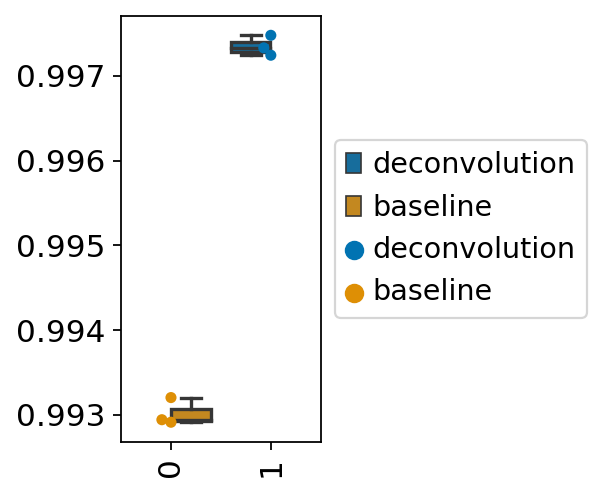

In [4]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    param_hue="model",
    graph_model_class='deconvolution',
    baseline_model_class='deconvolution_baseline',
    rename_levels = [
        ("model", {
            "DECONVOLUTION_PATIENT_destvi": "deconvolution",
            "DECONVOLUTION_BASELINE_PATIENT_destvi": "baseline",
        })
    ],
    figsize=(2, 3.5),
)

In [5]:
test_id = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "DECONVOLUTION_PATIENT_destvi")],
)
test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "DECONVOLUTION_BASELINE_PATIENT_destvi")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(test_r2, baseline_test_r2))

Ttest_relResult(statistic=33.92411396989335, pvalue=0.0008677954492374029)


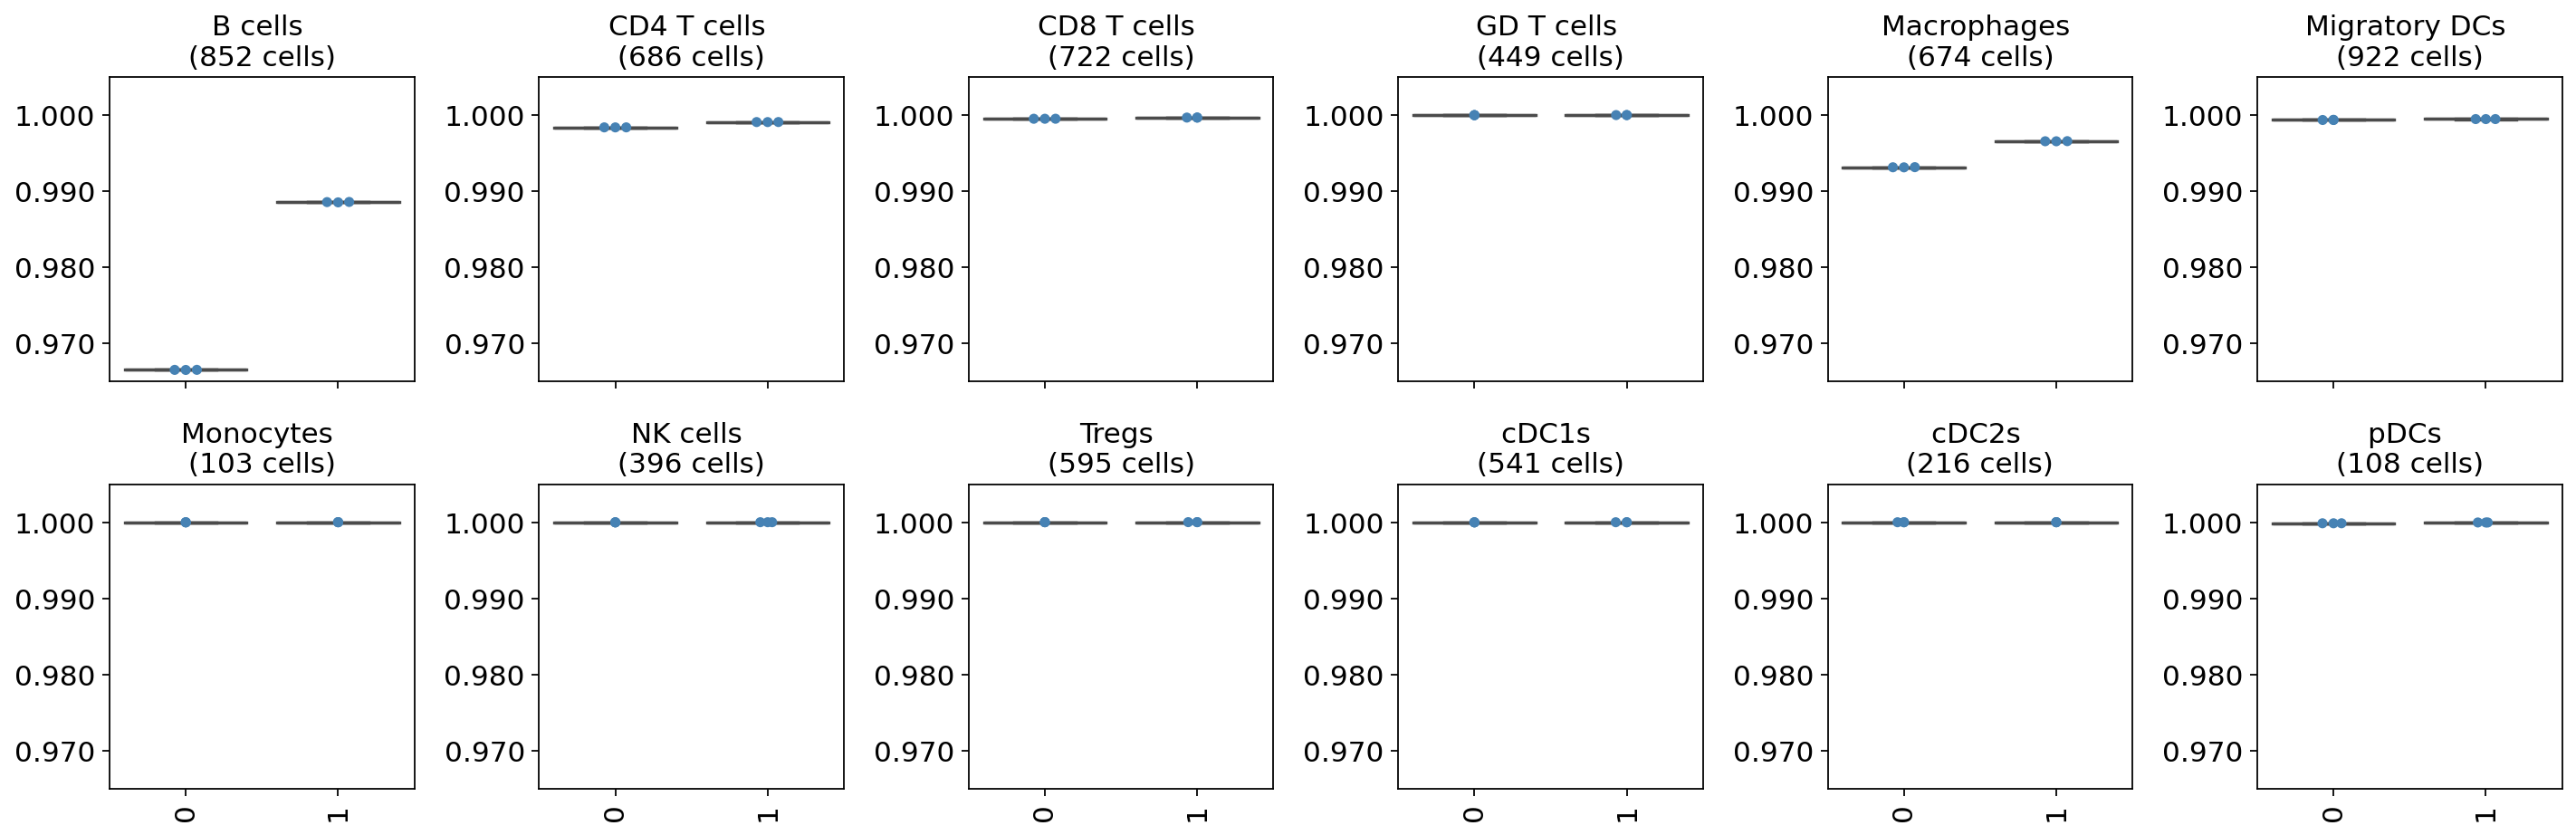

In [6]:
gs_linear.load_target_cell_evaluation()
plt.rcParams['axes.grid'] = False
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    yaxis_limit=(0.965, 1.005),
    ncols=6,
)

In [7]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "220125_DECONVOLUTION_PATIENT_destvi_lymphnode_gamma",
        "220125_DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode_gamma"
    ],
    lateral_resolution=1.
)
gs_linear.load_gs()

220125_DECONVOLUTION_PATIENT_destvi_lymphnode_gamma: loaded 1 runs with 3-fold cross validation
220125_DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode_gamma: loaded 1 runs with 3-fold cross validation


220125_deconvolution_baseline_patient_destvi_lymphnode_gamma_adam_lr1_bsS_md0_ri0_n100_fsstandard_l21_l11
subset was empty, available values for model are ['DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode'], given was ['DECONVOLUTION_PATIENT_destvi_lymphnode']
None
subset was empty, available values for model are ['DECONVOLUTION_PATIENT_destvi_lymphnode'], given was ['DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode']
None
220125_deconvolution_patient_destvi_lymphnode_gamma_adam_lr1_bsS_md0_ri1_n100_fsstandard_l21_l11


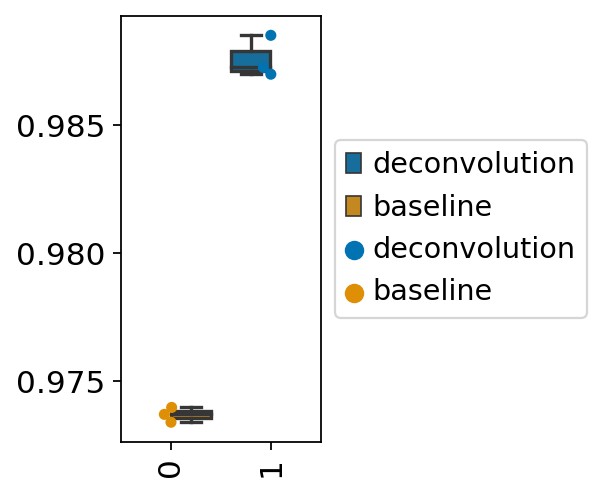

In [8]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    param_hue="model",
    graph_model_class='deconvolution',
    baseline_model_class='deconvolution_baseline',
    rename_levels = [
        ("model", {
            "DECONVOLUTION_PATIENT_destvi_lymphnode": "deconvolution",
            "DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode": "baseline",
        })
    ],
    figsize=(2, 3.5),
)

In [9]:
test_id = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "DECONVOLUTION_PATIENT_destvi_lymphnode")],
)
test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "DECONVOLUTION_BASELINE_PATIENT_destvi_lymphnode")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(test_r2, baseline_test_r2))

Ttest_relResult(statistic=38.50785673683712, pvalue=0.0006736933502969314)


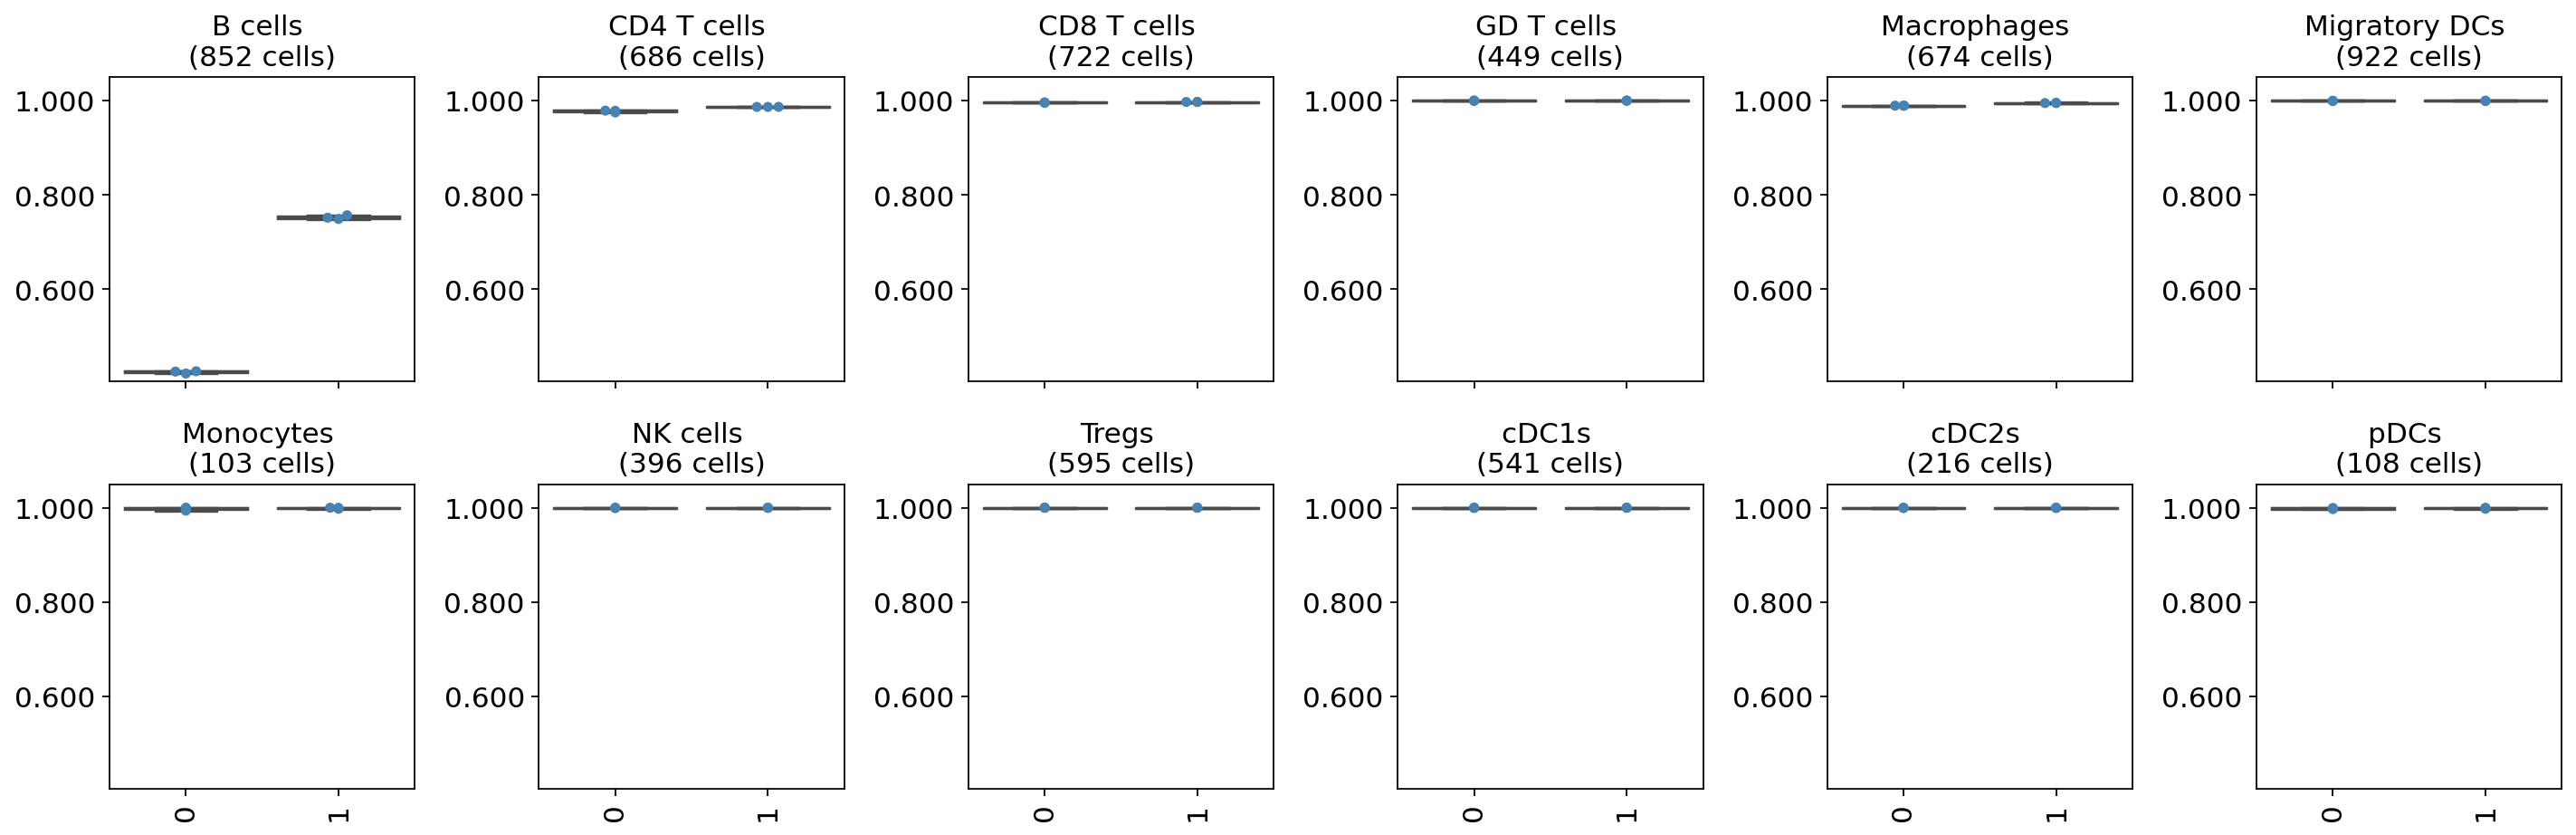

In [10]:
gs_linear.load_target_cell_evaluation()
plt.rcParams['axes.grid'] = False
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="n_rings",
    yaxis_limit=(0.405, 1.05),
    ncols=6,
)